In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from solar_forecasting.plant_config import default_plant_config
from pvlib import location, solarposition, irradiance
from solar_forecasting.clear_sky_model import calculate_clear_sky_irradiance

In [3]:
config = default_plant_config

In [4]:
config

PVPlantConfig(latitude=48.14951, longitude=11.56999, elevation=516, capacity_kwp=3, n_modules=12, module_area=1.67, tilt=30, azimuth=200)

In [5]:
# ------------------------------
# Dummy Input Data (2 days hourly)
# ------------------------------
# Simulated hourly weather and PV measurements for testing
# In practice, use real forecast data and measured output

dates = pd.date_range(start="2022-06-01", periods=48, freq="h", tz="UTC")
np.random.seed(42)
data = pd.DataFrame({
    'timestamp': dates,
    'temperature': 15 + 10 * np.random.rand(len(dates)),  # Random temps between 15-25°C
    'cloud_cover': np.random.randint(0, 9, len(dates)),   # Oktas scale (0-8)
    'pv_measurement': np.clip(                            # Simulated PV output with noise
        500 * np.sin(np.linspace(0, np.pi, len(dates))) + 50 * np.random.randn(len(dates)), 0, None
    )
})

In [6]:
data.head(5)

,timestamp,temperature,cloud_cover,pv_measurement
0,2022-06-01 00:00:00+00:00,18.745401,3,0.000000
1,2022-06-01 01:00:00+00:00,24.507143,5,72.606726
2,2022-06-01 02:00:00+00:00,22.319939,1,35.899690
3,2022-06-01 03:00:00+00:00,20.986585,1,116.237615
4,2022-06-01 04:00:00+00:00,16.560186,3,63.061850


In [7]:
data.shape

(48, 4)

In [8]:
# Calculate clear sky irradiance
df = calculate_clear_sky_irradiance(data, config)

In [9]:
df.head(20)

,timestamp,temperature,cloud_cover,pv_measurement,zenith,azimuth_sun,GHI,DNI,DHI,POA_irradiance,Pcs_kW
0,2022-06-01 00:00:00+00:00,18.745401,3,0.000000,108.992684,11.880992,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022-06-01 01:00:00+00:00,24.507143,5,72.606726,105.732332,26.041855,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-06-01 02:00:00+00:00,22.319939,1,35.899690,100.331308,39.192565,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-06-01 03:00:00+00:00,20.986585,1,116.237615,93.226778,51.228730,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022-06-01 04:00:00+00:00,16.560186,3,63.061850,84.857638,62.333905,20.304052,74.100416,13.471946,12.909525,0.038806
5,2022-06-01 05:00:00+00:00,16.559945,7,149.972114,75.612501,72.873690,150.534537,374.659382,57.061113,55.759719,0.167614
6,2022-06-01 06:00:00+00:00,15.580836,6,192.203774,65.830535,83.348165,321.127528,569.946004,87.453848,172.442463,0.518362
7,2022-06-01 07:00:00+00:00,23.661761,8,273.563748,55.837371,94.435974,492.073851,682.011767,108.865553,365.774651,1.099519
8,2022-06-01 08:00:00+00:00,21.011150,7,344.522363,46.017316,107.154700,644.617076,748.566606,124.627817,563.896527,1.695073
9,2022-06-01 09:00:00+00:00,22.080726,4,312.008024,36.957728,123.166918,765.861794,788.256742,135.883695,739.075569,2.221661


<Figure size 1200x600 with 0 Axes>

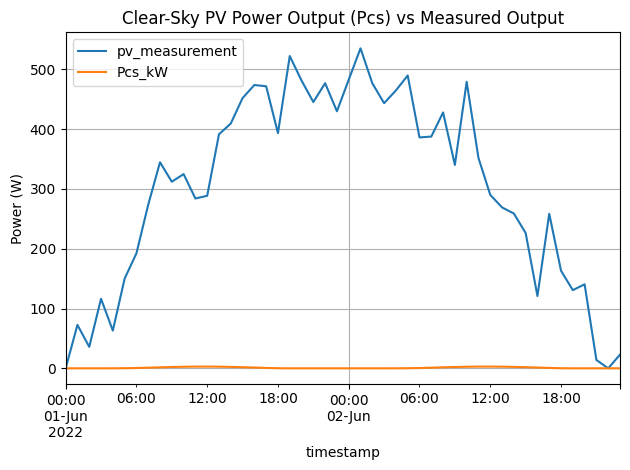

In [11]:
plt.figure(figsize=(12, 6))
df.set_index('timestamp')[['pv_measurement', 'Pcs_kW']].plot(title='Clear-Sky PV Power Output (Pcs) vs Measured Output')
plt.ylabel('Power (W)')
plt.grid(True)
plt.tight_layout()
plt.show()
